In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from DB.db_manager import DBManager

In [3]:
train_imgs, train_labels, test_imgs, test_labels = DBManager.load_data("C:/Users/antho/Documents/GitHub/data/handsigns/")

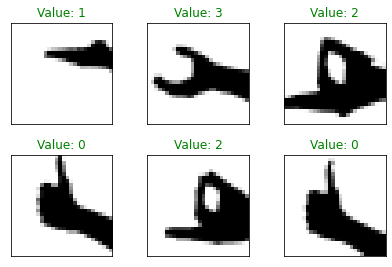

In [4]:
# displaying samples of data
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_imgs[i].reshape([28, 28]), cmap='gray', interpolation='none')
    plt.title("Value: {}".format(train_labels[i]), color='g')  
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])

In [5]:
from homemade_framework import framework as NN

In [9]:
# number of epoch
num_epochs = 10
# batch size to compute mini-batch
batch_size = 100
# number of pixels in the image 
input_size = 28*28
# number of possible digit: 0 to 9 
num_class = 4
# small step to find a minima
learning_rate = 0.01
# hidden size
hidden_size = 128
# p dropout
p_dropout = 0
# learning rate decay
LRD = False

## CNN

In [7]:
# Build the model
kernel_size = 3
in_channels = 1
out_channels = 2
data_size = train_imgs.shape[2]
nb_maxpool = 1
out_first_conv = (data_size - kernel_size + 1) // (2*nb_maxpool) - kernel_size + 1

# Build the model
cnn_model = NN.Sequential([NN.Convolution(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.MaxPooling2D(2),
                           NN.Convolution(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.Flatten(), NN.BatchNorm(),
                           NN.Linear((out_first_conv**2)*out_channels, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
cnn_model.set_Lr(learning_rate)
# Print model's parameters
cnn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Convolution feature maps: 2, kernel size: (2, 1, 3, 3)
	LeakyReLU activation, a=0.01
	Max Pooling layer, size: 2
	Convolution feature maps: 2, kernel size: (2, 2, 3, 3)
	LeakyReLU activation, a=0.01
	Flatten function
	Batch normalization function: a=1, b=0
	Linear layer shape: [242, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 10]
	Softmax function
	MSE


In [ ]:
NN.train_homemade_model(cnn_model, num_epochs, train_imgs, train_labels, test_imgs, test_labels, batch_size)

## FCN

In [12]:
# number of pixels in the image 
input_size = 28*28
# number of hidden neurons
hidden_size = 40

train_imgs_flatten = train_imgs.reshape([train_imgs.shape[0], np.prod(train_imgs.shape[1:])])
test_imgs_flatten = test_imgs.reshape([test_imgs.shape[0], np.prod(test_imgs.shape[1:])])

# Build the model
fcn_model = NN.Sequential([NN.Linear(input_size, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
fcn_model.set_Lr(learning_rate)
# Print model's parameters
fcn_model.print(print_color=True)

NN.train_homemade_model(fcn_model, 10, train_imgs_flatten, train_labels, test_imgs_flatten, test_labels, batch_size)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Linear layer shape: [784, 40]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [40, 40]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [40, 4]
	Softmax function
	MSE
Before training: Epoch: 0, Train Error: 76.2923%,        Test Error: 69.0377%, Loss  0.0000
Epoch: 1, Train Error: 37.2549%,        Test Error: 42.6778%, Loss  97.3998
Epoch: 2, Train Error: 24.7772%,        Test Error: 34.7280%, Loss  55.4329
Epoch: 3, Train Error: 17.1123%,        Test Error: 30.9623%, Loss  40.9419
Epoch: 4, Train Error: 14.7950%,        Test Error: 28.0335%, Loss  33.2617
Epoch: 5, Train Error: 13.1907%,        Test Error: 26.7782%, Loss  28.7550
Epoch: 6, Train Error: 8.7344%,        Test Error: 24.2678%, Loss